(2, [[-1.10722600e+01, -1.80471361e+01, -1.95773400e+01, -1.53594680e+01,  2.86514052e+00, -1.14777099e+01, -3.28610217e+00,  2.17815185e+01, -4.92748333e+00,  1.54356398e+01, -1.71800285e+01, -1.90314890e+01,  3.33450356e+00, -1.99135119e+01,  6.51482032e-01, -1.05416225e+01, -6.71293540e+00, -5.81160683e+00, -2.31269266e+00,  2.09903212e+00, -9.94852752e+00, -1.93584640e+00, -2.76420238e+00,  3.44699958e+00,  7.78385673e+00,  1.35215850e+01,  2.92366455e+01,  8.28468392e+00,  2.53802422e+01, -6.03659318e-01,  4.37474736e-01, -9.75166698e+00,  5.66478158e+00, -1.04903275e+01, -1.02544323e-01, -8.28791161e+00,  1.22455544e+01,  4.32086338e+00,  7.95211748e+00, -1.06600630e+00, -5.83698983e+00,  6.30182903e+00,  1.36548162e+01, -2.62261349e+01,  4.35284425e+00,  1.26226640e+01,  1.53445817e+01, -6.66225246e+00, -7.98197920e+00, -7.94448928e+00,  5.21150947e+00,  1.45619691e+01, -1.13387493e+01,  3.84077900e+00, -6.38918295e+00, -7.72443781e+00, -1.00538764e+01, -1.48885367e+01,  1.85527

next Pictures are proccesed with ICA 


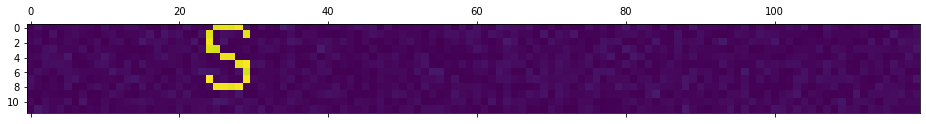

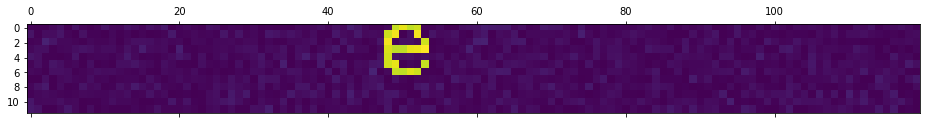

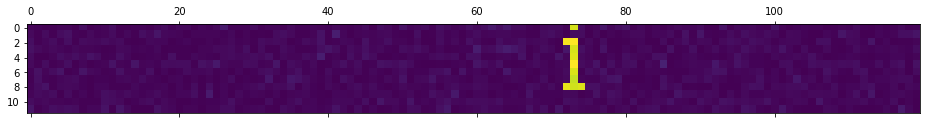

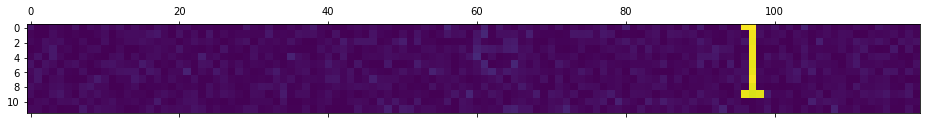

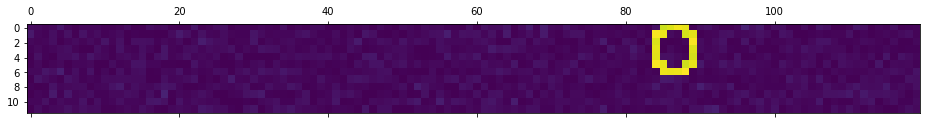

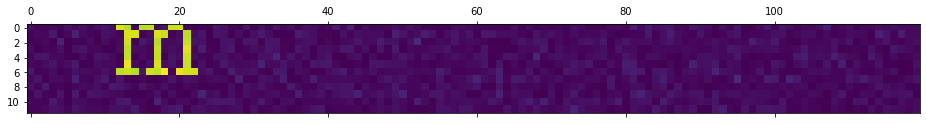

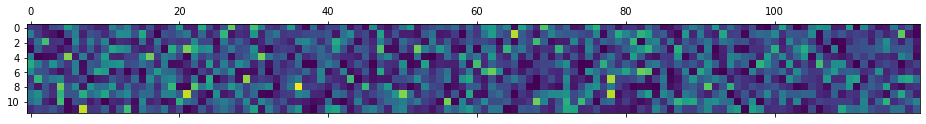

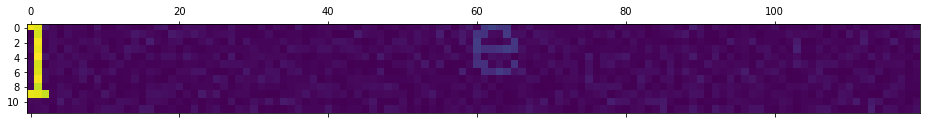

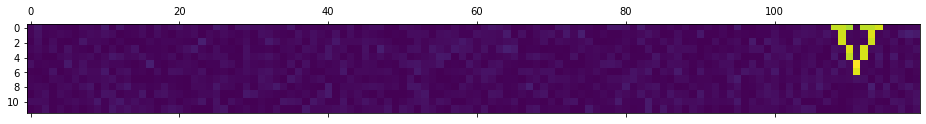

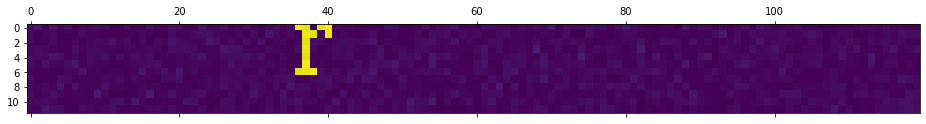

next Pictures are proccesed with PCA 


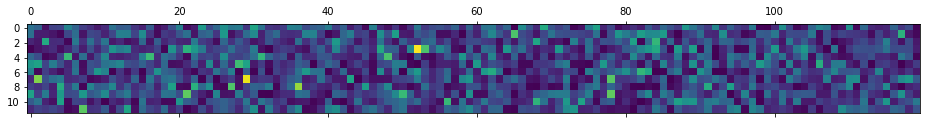

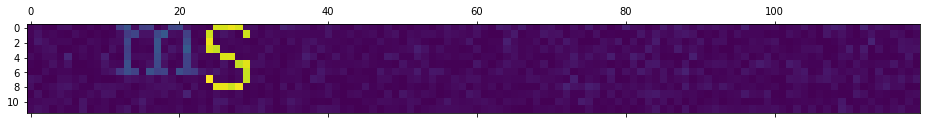

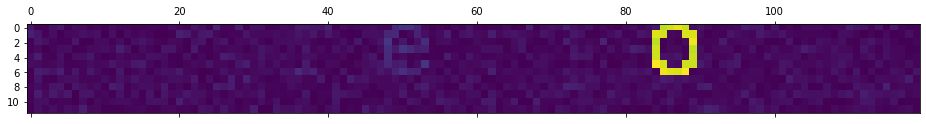

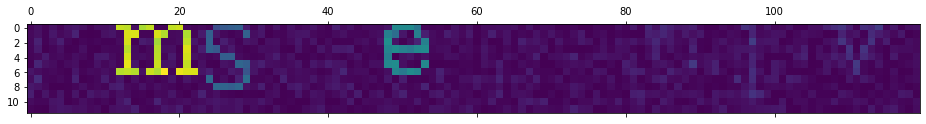

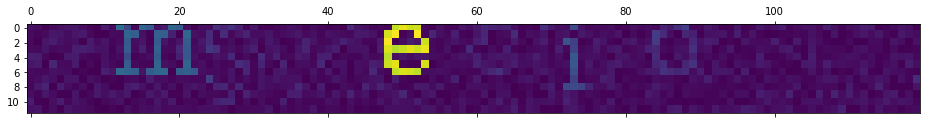

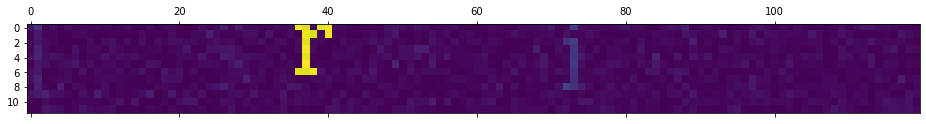

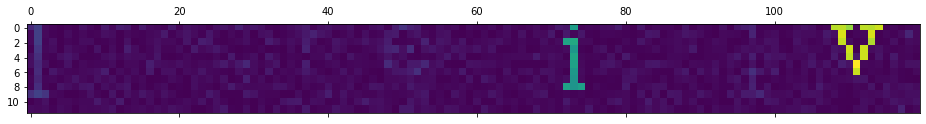

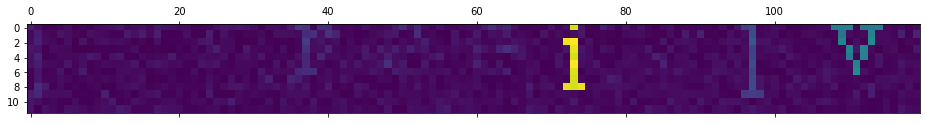

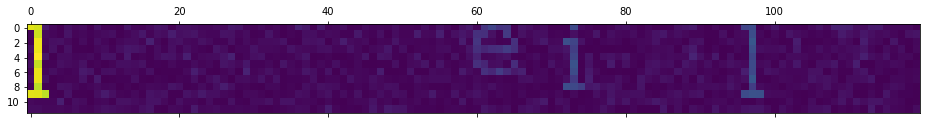

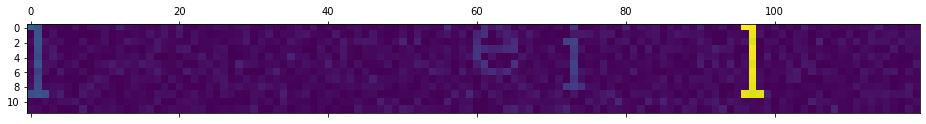

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import FastICA, PCA
from sklearn import decomposition



# Enable plots inside the Jupyter NotebookLet the
%matplotlib inline

image_height=12
noofcomponents=10
image_width=image_height*noofcomponents
image_shape=(image_height,image_width)
noofpixels=image_height*image_width

datafilename="/home/w_khalili/ica/A_challenge_for_Wala'a Khalili.hdf5"



from tables import *

# Create Sample/Row types
class WordImage(IsDescription):
    idnumber  = Int64Col()      # Signed 64-bit integer
    image = Float64Col(image_shape)    # double (double-precision)

# Create ICA dataset for individual student
ImagesFile = open_file(datafilename, mode = "r")
ImagesTable=ImagesFile.root.Images.Images
 
print(ImagesTable[2])    
 # my code

    
new_data = list()
for x in ImagesTable.iterrows(): # (3000,)
    data = x['image'].reshape(1440,1)
    new_data.append(data)

# ICA data Processing , the output was scrambeled, and every time give new output 

print("next Pictures are proccesed with ICA ")

stack_new_data = np.hstack(new_data)
ica = FastICA(n_components=10)
S_ica_ = ica.fit_transform(stack_new_data)  # Reconstruct signals
A_ica_ = ica.mixing_  # Get estimated mixing matrix
abs_value_data = np.absolute(S_ica_)

final_data = [abs_value_data[:,y].reshape(12,120) for y in range(10)]
for y in range(10):
    plt.matshow(final_data[y])   
    plt.show()    

print("next Pictures are proccesed with PCA ")

#PCA Data Processing , the output was somervill a city in America, every time gives the same output

pca = PCA(n_components=10)
PCA_data = pca.fit_transform(stack_new_data)
abs_value_data = np.absolute(PCA_data)

final_data = [abs_value_data[:,y].reshape(12,120) for y in range(10)]
for y in range(10):
    plt.matshow(final_data[y])   
    plt.show()
    
    

 # Data reading and plotting the result. This is where you should put your own code.


#dataset=np.zeros((ImagesTable.nrows,noofpixels))
#for x in ImagesTable.iterrows(0,10): # Start and stop are specified here, you need to process entire dataset!
#    plt.matshow(x['image'], interpolation='nearest', cmap=cm.jet)
#    plt.show()
        

#ImagesTable.close()
